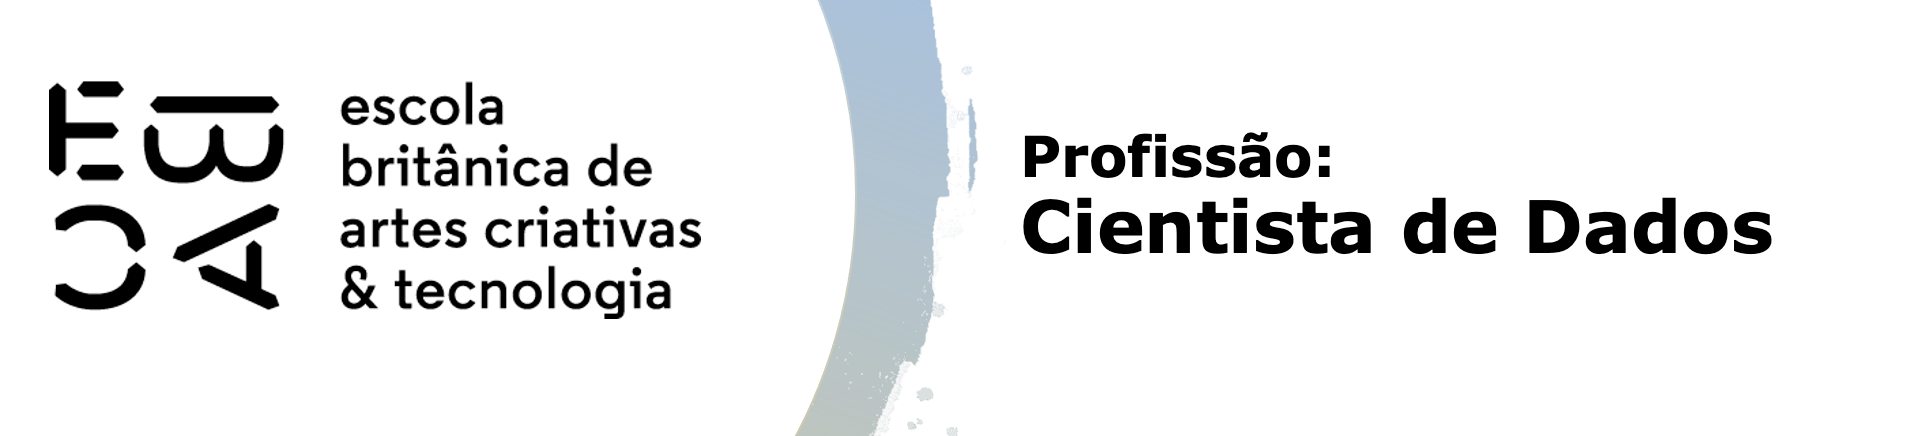

# Tarefa

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind

In [46]:
pg = sns.load_dataset('penguins')

In [47]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

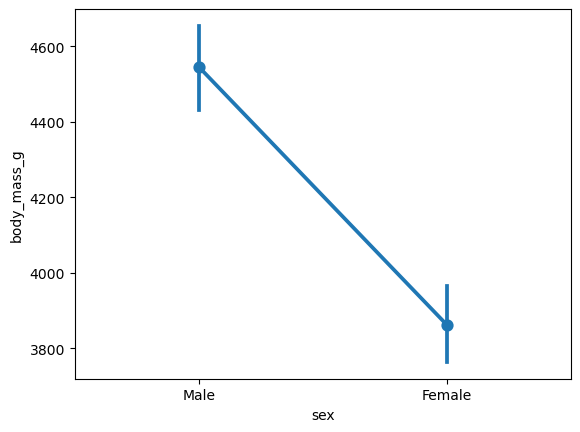

In [48]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

----

**Hipóteses:**

- 𝐻0 : As médias dos pesos de machos e fêmeas são iguais.
- Hα : As médias dos pesos de machos e fêmeas são diferentes.


passos para realizar o teste T:

- Filtrar os dados de machos e fêmeas.
- Verificar se as variáveis atendem à suposição de normalidade (opcional).
- Aplicar o teste T para amostras independentes.
- Analisar os resultados, em particular o p-value, com um nível de significância de 5%

In [52]:
femeas = pg[pg['sex'] == 'Female']['body_mass_g']
machos = pg[pg['sex'] == 'Male']['body_mass_g']

# Teste T para amostras independentes
t_stat, p_value = ttest_ind(machos, femeas, equal_var=False)

print(f"Estatística t: {t_stat}")
print(f"P-valor: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: Há uma diferença significativa entre o peso de machos e fêmeas.")
else:
    print("Não rejeitamos H0: Não há diferença significativa entre o peso de machos e fêmeas.")

Estatística t: 8.554537231165762
P-valor: 4.793891255051457e-16
Rejeitamos H0: Há uma diferença significativa entre o peso de machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

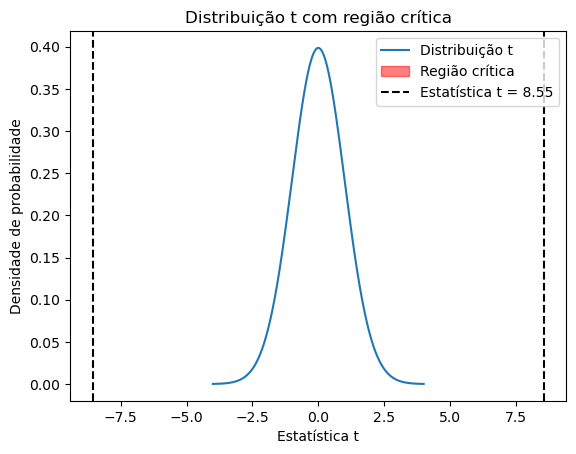

In [54]:
df = len(femeas) + len(machos) - 2  # Graus de liberdade
x = np.linspace(-4, 4, 1000)
t_dist = t.pdf(x, df)

# Plotar a distribuição t
plt.plot(x, t_dist, label='Distribuição t')
plt.fill_between(x, 0, t_dist, where=(x < -abs(t_stat)) | (x > abs(t_stat)), color='red', alpha=0.5, label='Região crítica')
plt.axvline(x=t_stat, color='black', linestyle='--', label=f'Estatística t = {t_stat:.2f}')
plt.axvline(x=-t_stat, color='black', linestyle='--')
plt.title('Distribuição t com região crítica')
plt.xlabel('Estatística t')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [56]:
print(pg['species'].unique())
species = pg['species'].unique()

for specie in species:
    femeas = pg[(pg['sex'] == 'Female') & (pg['species'] == specie)]['body_mass_g']
    machos = pg[(pg['sex'] == 'Male') & (pg['species'] == specie)]['body_mass_g']

    t_stat, p_value = ttest_ind(machos, femeas, equal_var=False)
    
    print(f"\nEspécie: {specie}")
    print(f"Estatística t: {t_stat:}")
    print(f"P-valor: {p_value:}")
    
    if p_value < alpha:
        print("Rejeitamos H0: Há uma diferença significativa entre machos e fêmeas.")
    else:
        print("Não rejeitamos H0: Não há diferença significativa entre machos e fêmeas.")


['Adelie' 'Chinstrap' 'Gentoo']

Espécie: Adelie
Estatística t: 13.126285923485874
P-valor: 6.402319748031793e-26
Rejeitamos H0: Há uma diferença significativa entre machos e fêmeas.

Espécie: Chinstrap
Estatística t: 5.20773384899266
P-valor: 2.26443155146514e-06
Rejeitamos H0: Há uma diferença significativa entre machos e fêmeas.

Espécie: Gentoo
Estatística t: 14.761368414543291
P-valor: 1.8677596749117468e-28
Rejeitamos H0: Há uma diferença significativa entre machos e fêmeas.
